<a href="https://colab.research.google.com/github/AryaZade04/Machine_Learning_Lab/blob/main/ML_Practical3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#practical-03
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Insert null values in random positions in the dataset
# Let's say we want to insert 10 null values randomly across the dataset
for _ in range(10):
    # Randomly choose a row and column index
    i = np.random.randint(0, df.shape[0])  # row index
    j = np.random.randint(0, df.shape[1])  # column index
    df.iat[i, j] = np.nan  # set the cell to NaN

In [ ]:
# Display info after inserting nulls
print("\n--- After inserting null values ---")
print(df.isnull().sum())  # count nulls in each column



--- After inserting null values ---
sepal length (cm)    1
sepal width (cm)     2
petal length (cm)    4
petal width (cm)     3
dtype: int64


In [12]:
# Create two copies to fill separately
df_mean_filled = df.copy()
df_median_filled = df.copy()

In [13]:
# Fill null values with mean
df_mean_filled.fillna(df_mean_filled.mean(numeric_only=True), inplace=True)

In [14]:
# Fill null values with median
df_median_filled.fillna(df_median_filled.median(numeric_only=True), inplace=True)

In [15]:
# Display null count after filling
print("\nNull values after filling with MEAN:")
print(df_mean_filled.isnull().sum())

print("\nNull values after filling with MEDIAN:")
print(df_median_filled.isnull().sum())


Null values after filling with MEAN:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Null values after filling with MEDIAN:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [16]:
# Show a few rows for comparison
print("\nSample data (mean filled):")
print(df_mean_filled.head())

print("\nSample data (median filled):")
print(df_median_filled.head())


Sample data (mean filled):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Sample data (median filled):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


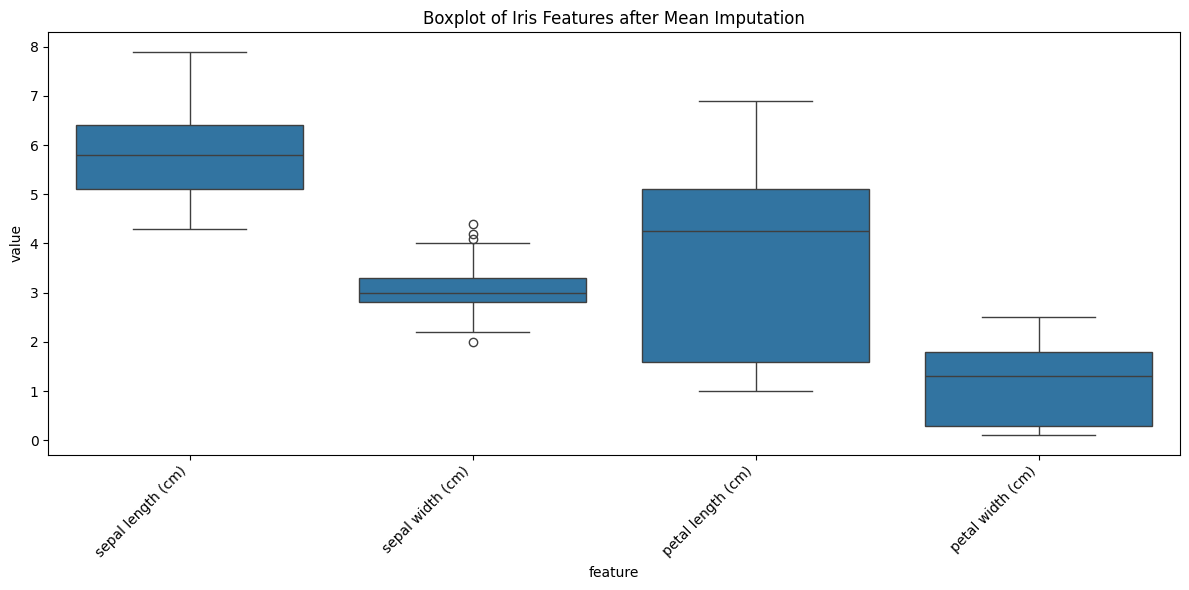

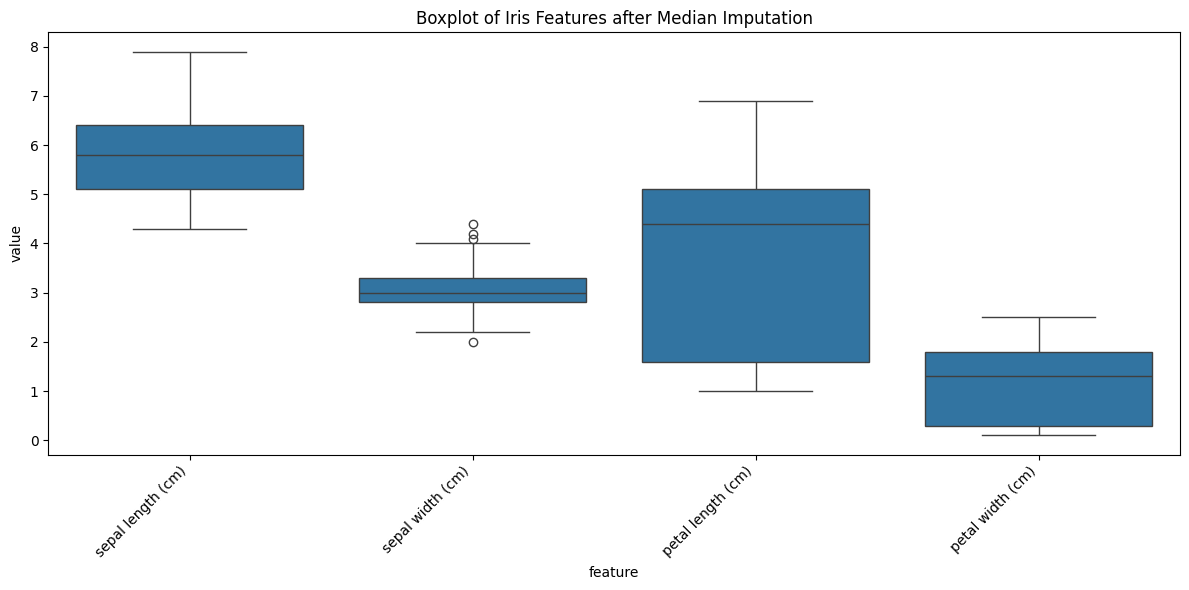

In [19]:
# Melt the dataframe for easier plotting with seaborn
df_mean_melted = df_mean_filled.melt(var_name='feature', value_name='value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='feature', y='value', data=df_mean_melted)
plt.title('Boxplot of Iris Features after Mean Imputation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Melt the median filled dataframe
df_median_melted = df_median_filled.melt(var_name='feature', value_name='value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='feature', y='value', data=df_median_melted)
plt.title('Boxplot of Iris Features after Median Imputation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()